In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6516,0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,0.564000
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,0.581667
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860000
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,11391,0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,0.816000


## SVM for Year 2013 STEM Class

In [19]:
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
tempDf = df[['year','term','module_domain','code_module',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 5 observations of the dataset
tempDf.head(5)

,year,term,module_domain,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81.0,565.0,0.581667,-137.0,2,261,0,0,3,3.0,90
9,0,1,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-128.0,0,240,0,0,2,4.0,90
21,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,111.0,367.0,0.146667,-47.0,1,268,2,0,3,8.0,60
26,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.000000,-61.0,1,268,0,0,1,0.0,30


In [34]:
X=tempDf[['term','code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
          'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
          'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
          'module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits']]
y=tempDf['final_result']

In [35]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
sel = SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=2000))
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    loss='squared_hinge', max_iter=2000,
                                    multi_class='ovr', penalty='l1',
                                    random_state=None, tol=0.0001, verbose=0),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [37]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

9

In [38]:
print(selected_feat)

Index(['term', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'module_presentation_length', 'highest_education',
       'imd_band', 'studied_credits'],
      dtype='object')


In [46]:
# Define our predictors
X=tempDf[['term', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'module_presentation_length', 'highest_education', 'imd_band',
       'studied_credits']]
y=tempDf['final_result']

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [66]:
X_train.head(5)

,term,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,module_presentation_length,highest_education,imd_band,studied_credits
8679,1,66.0,1747.0,0.755000,-59.0,240,2,9.0,90
10820,1,4.0,57.0,0.017544,-36.0,240,3,6.0,60
14362,0,530.0,2938.0,0.933333,-113.0,268,1,8.0,60
16572,0,385.0,2558.0,0.846667,-60.0,268,2,1.0,120
10558,1,36.0,560.0,0.452895,-25.0,240,2,0.0,60


In [67]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1020
           1       0.77      0.83      0.80       927

    accuracy                           0.80      1947
   macro avg       0.80      0.80      0.80      1947
weighted avg       0.81      0.80      0.80      1947



In [69]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.802773497688752


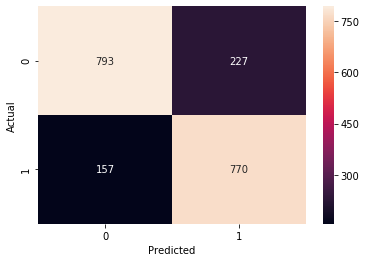

In [70]:
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')

In [71]:
# Predict 2014 Results
tempDf2 = df[['year','term','module_domain','code_module',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year == 1)&(tempDf2.module_domain==1)]

In [72]:
stemtest = pd.DataFrame(tempDf2,columns= ['term', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'module_presentation_length', 'highest_education', 'imd_band',
       'studied_credits'])

In [73]:
y_pred_stem = svc.predict(stemtest)
y_test_stem=tempDf2['final_result']

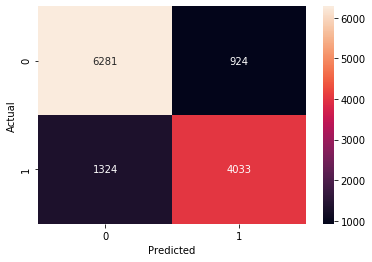

In [74]:
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test_stem, y_pred_stem, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')

In [75]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_stem, y_pred_stem))

Accuracy:  0.8210476038847317


## SVM for 2013 Social Science Class

In [5]:
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
tempDf2 = df[['year','term','module_domain','code_module',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year == 0)&(tempDf2.module_domain==0)]
# Show first 5 observations of the dataset
tempDf2.head(5)

,year,term,module_domain,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,98.0,612.0,0.816000,-159.0,2,268,0,1,3,9.0,240
5,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,14.0,147.0,0.388140,-47.0,0,240,2,0,1,2.0,60
6,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-194.0,0,268,0,0,2,4.0,60
8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6.0,365.0,0.896129,-27.0,0,268,0,1,2,5.0,60
12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.0,1465.0,0.630000,-73.0,0,240,0,1,1,2.0,120


In [6]:
X=tempDf2[['term','code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
          'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
          'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
          'module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits']]
y=tempDf2['final_result']

In [7]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
sel = SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=2000))
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    loss='squared_hinge', max_iter=2000,
                                    multi_class='ovr', penalty='l1',
                                    random_state=None, tol=0.0001, verbose=0),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [9]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

9

In [10]:
print(selected_feat)

Index(['term', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'module_presentation_length', 'highest_education',
       'imd_band', 'studied_credits'],
      dtype='object')


In [11]:
# Define our predictors
X=tempDf2[['term', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'module_presentation_length', 'highest_education', 'imd_band',
       'studied_credits']]
y=tempDf2['final_result']

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       559
           1       0.85      0.77      0.80       524

    accuracy                           0.82      1083
   macro avg       0.82      0.82      0.82      1083
weighted avg       0.82      0.82      0.82      1083



In [16]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8199445983379502


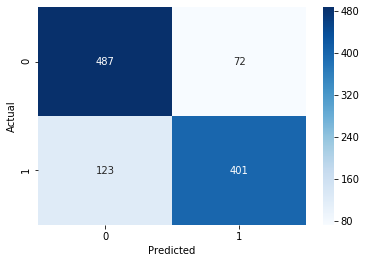

In [18]:
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

## SVM for combined STEM and Social Science

In [127]:
ComtempDf = df[['year','term','code_module','module_domain','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region','gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits','date_registration']]
ComtempDf = ComtempDf.loc[(ComtempDf.year == 0)]
# Show first 20 observations of the dataset, this is the combine dataset for 2013 STEM and Social Science Class
ComtempDf.head(5)

,year,term,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,261,0,0,3,9.0,60,-68.0
2,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.581667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.816000,612.0,98.0,2,268,0,1,3,9.0,240,-159.0
5,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.388140,147.0,14.0,0,240,2,0,1,2.0,60,-47.0
6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,268,0,0,2,4.0,60,-194.0


In [128]:
ComtempDf.count()

year                          12118
term                          12118
code_module                   12118
module_domain                 12118
Scotland                      12118
East Anglian Region           12118
London Region                 12118
South Region                  12118
North Western Region          12118
West Midlands Region          12118
South West Region             12118
East Midlands Region          12118
South East Region             12118
Wales                         12118
Yorkshire Region              12118
North Region                  12118
gender                        12118
disability                    12118
std_half_score                12118
half_sum_clicks               12118
b4_sum_clicks                 12118
age_band                      12118
module_presentation_length    12118
num_of_prev_attempts          12118
final_result                  12118
highest_education             12118
imd_band                      12118
studied_credits             

In [129]:
X=ComtempDf[['term','code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
          'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
          'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
          'module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits']]
y=ComtempDf['final_result']

In [130]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [131]:
sel = SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=2000))
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    loss='squared_hinge', max_iter=2000,
                                    multi_class='ovr', penalty='l1',
                                    random_state=None, tol=0.0001, verbose=0),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [132]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

11

In [133]:
print(selected_feat)

Index(['term', 'code_module', 'b4_sum_clicks', 'half_sum_clicks',
       'std_half_score', 'date_registration', 'module_presentation_length',
       'num_of_prev_attempts', 'highest_education', 'imd_band',
       'studied_credits'],
      dtype='object')


In [134]:
# Define our predictors
X=ComtempDf[['term','code_module','b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'module_presentation_length', 'num_of_prev_attempts','highest_education', 'imd_band',
       'studied_credits']]
y=ComtempDf['final_result']

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [140]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [141]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1618
           1       0.87      0.75      0.80      1412

    accuracy                           0.83      3030
   macro avg       0.83      0.82      0.83      3030
weighted avg       0.83      0.83      0.83      3030



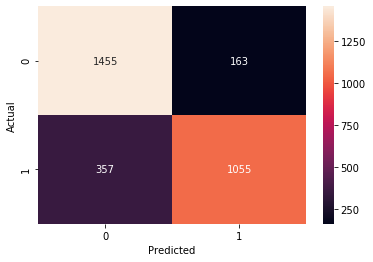

In [143]:
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')

In [154]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8283828382838284


In [158]:
# Function to plot accuracy
from sklearn.model_selection import learning_curve
import numpy as np
def plot_accuracy(model):

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylim(0.0, 1.1)
    plt.title("Accuracy Plot")
    plt.xlabel("Testing")
    plt.ylabel("Accuracy %")

    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
        
    plt.plot(train_sizes, test_mean, 'bo-', color = "r", label="Test Score")


/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


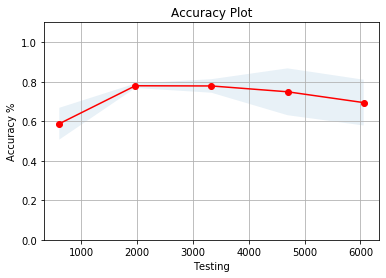

In [159]:
plot_accuracy(svc)

In [145]:
# Predict 2014 Results
ComtempDf2 = df[['year','term','code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region',
          'West Midlands Region','South West Region','East Midlands Region','South East Region','Wales',
          'Yorkshire Region','North Region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score',
          'date_registration','age_band','module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits','final_result']]
ComtempDf2 = ComtempDf2.loc[(ComtempDf2.year == 1)]

In [149]:
comtest = pd.DataFrame(ComtempDf2,columns= [ 'term','code_module','b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'module_presentation_length', 'num_of_prev_attempts','highest_education', 'imd_band',
       'studied_credits'])

In [150]:
y_pred_new = svc.predict(comtest)
y_test_new=ComtempDf2['final_result']

In [151]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.8052644116245832


In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      9327
           1       0.85      0.69      0.76      7465

    accuracy                           0.81     16792
   macro avg       0.81      0.79      0.80     16792
weighted avg       0.81      0.81      0.80     16792



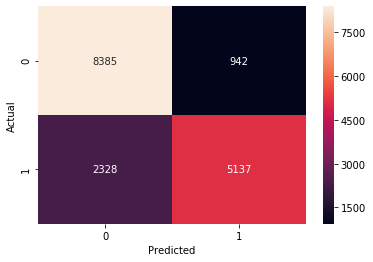

In [153]:
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')